## Import libraries and read in dataset

In [1]:
# Import packages
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
os.chdir('/Users/kelvinhsueh/Desktop/credit-score-prediction')

In [3]:
%pwd

'/Users/kelvinhsueh/Desktop/credit-score-prediction'

In [6]:
df = pd.read_csv('data/raw_data/train.csv')
test = pd.read_csv('data/raw_data/test.csv')
df.head()

/var/folders/rl/wf0278bd5gz66g636t1b68vw0000gn/T/ipykernel_43379/226289688.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/raw_data/train.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


## Data Cleaning

In [7]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [8]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [9]:
columns = ['Age','Annual_Income', 'Num_Bank_Accounts',
'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
'Credit_History_Age',
'Payment_of_Min_Amount', 'Occupation',
'Payment_Behaviour', 'Monthly_Balance','Credit_Score']

In [10]:
### Drop features with no meaningful information 
df = df[[column for column in df.columns if column in columns]]
df.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,4,3,4,3,7,11.27,4.0,_,809.98,22 Years and 1 Months,No,High_spent_Small_value_payments,312.49408867943663,Good
1,23,Scientist,19114.12,3,4,3,4,-1,NaN,11.27,4.0,Good,809.98,NaN,No,Low_spent_Large_value_payments,284.62916249607184,Good
2,-500,Scientist,19114.12,3,4,3,4,3,7,_,4.0,Good,809.98,22 Years and 3 Months,No,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,Scientist,19114.12,3,4,3,4,5,4,6.27,4.0,Good,809.98,22 Years and 4 Months,No,Low_spent_Small_value_payments,223.45130972736786,Good
4,23,Scientist,19114.12,3,4,3,4,6,NaN,11.27,4.0,Good,809.98,22 Years and 5 Months,No,High_spent_Medium_value_payments,341.48923103222177,Good


In [110]:
## Check dataset shape
df.shape

(100000, 18)

In [111]:
df.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,4,3,4,3,7,11.27,4.0,_,809.98,22 Years and 1 Months,No,High_spent_Small_value_payments,312.49408867943663,Good
1,23,Scientist,19114.12,3,4,3,4,-1,NaN,11.27,4.0,Good,809.98,NaN,No,Low_spent_Large_value_payments,284.62916249607184,Good
2,-500,Scientist,19114.12,3,4,3,4,3,7,_,4.0,Good,809.98,22 Years and 3 Months,No,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,Scientist,19114.12,3,4,3,4,5,4,6.27,4.0,Good,809.98,22 Years and 4 Months,No,Low_spent_Small_value_payments,223.45130972736786,Good
4,23,Scientist,19114.12,3,4,3,4,6,NaN,11.27,4.0,Good,809.98,22 Years and 5 Months,No,High_spent_Medium_value_payments,341.48923103222177,Good


## Upon checking the data, it seems that a lot of the columns contains invalid values

In [112]:
# Check each column for incorrect data
for i in df:
  print('\n',i, df[i].unique())


 Age ['23' '-500' '28_' ... '4808_' '2263' '1342']

 Occupation ['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']

 Annual_Income ['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_']

 Num_Bank_Accounts [   3    2    1    7    4    0    8    5    6    9   10 1414 1231   67
  572 1488   91  528 1647 1696 1338  649  889 1668  685  857  975 1496
 1534 1620   37 1388 1429 1332 1588  120 1777 1096  803  494  744 1139
  831 1613  741  121  665 1748 1644  823 1356 1651   87  711  450  210
 1671 1722  648  672 1662 1495  510  666  429 1131 1434  980 1026  526
  718 1300 1312 1315  501 1566  480 1042  322  628 1016  333 1265  791
  427  563  905 1190 1036 1611   38  619  555 1769  280  752 1201  812
 1487  222  212 1019 1222  610 1714 1308  525 1158 1115 1616  754 1601
  797 1577  521  703  933  959  809 1089 1656 1113 1715  964 1533 1789

In [113]:
#### Cleaning age column ####
def clean_col(col):
    col = pd.to_numeric(col, errors='coerce')
    # Replace negative values with NaN
    col = col.apply(lambda x: x if x > 0 else np.nan)
    if col.name == 'Age':
        col = col.apply(lambda x: x if 1 <= x <= 100 else np.nan)
    return col

df['Age'] = clean_col(df['Age'])

#Check column
df['Age'].unique()

array([ 23.,  nan,  28.,  34.,  54.,  55.,  21.,  31.,  33.,  30.,  24.,
        44.,  45.,  40.,  41.,  32.,  35.,  36.,  39.,  37.,  20.,  46.,
        26.,  42.,  19.,  48.,  38.,  43.,  22.,  16.,  18.,  15.,  27.,
        25.,  14.,  17.,  47.,  53.,  56.,  29.,  49.,  51.,  50.,  52.,
        99., 100.,  95.])

In [114]:
#### Cleaning occupation column ####
df = df[df['Occupation'].str.contains('_______') == False]
df['Occupation'].unique()

array(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur', 'Developer',
       'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager',
       'Accountant', 'Musician', 'Mechanic', 'Writer', 'Architect'],
      dtype=object)

In [115]:
#### Cleaning annual income column####
df['Annual_Income'] = clean_col(df['Annual_Income'])
#Check column
df['Annual_Income'].unique()

array([19114.12, 34847.84,      nan, ..., 37188.1 , 20002.88, 39628.99])

In [116]:
#### Cleaning Num_Bank_Accounts column####
df['Num_Bank_Accounts'] = clean_col(df['Num_Bank_Accounts'])
#Check column
df['Num_Bank_Accounts'].unique()

array([3.000e+00, 2.000e+00, 1.000e+00, 7.000e+00, 4.000e+00,       nan,
       8.000e+00, 5.000e+00, 6.000e+00, 9.000e+00, 1.000e+01, 1.414e+03,
       1.231e+03, 6.700e+01, 1.488e+03, 9.100e+01, 5.280e+02, 1.647e+03,
       1.696e+03, 1.338e+03, 6.490e+02, 8.890e+02, 1.668e+03, 6.850e+02,
       8.570e+02, 9.750e+02, 1.496e+03, 1.534e+03, 1.620e+03, 3.700e+01,
       1.388e+03, 1.429e+03, 1.332e+03, 1.588e+03, 1.200e+02, 1.777e+03,
       1.096e+03, 8.030e+02, 4.940e+02, 7.440e+02, 1.139e+03, 8.310e+02,
       1.613e+03, 7.410e+02, 1.210e+02, 1.748e+03, 1.644e+03, 8.230e+02,
       1.356e+03, 1.651e+03, 8.700e+01, 7.110e+02, 4.500e+02, 2.100e+02,
       1.671e+03, 1.722e+03, 6.480e+02, 6.720e+02, 1.662e+03, 1.495e+03,
       5.100e+02, 6.660e+02, 4.290e+02, 1.131e+03, 1.434e+03, 1.026e+03,
       5.260e+02, 7.180e+02, 1.300e+03, 1.312e+03, 1.315e+03, 5.010e+02,
       1.566e+03, 4.800e+02, 1.042e+03, 3.220e+02, 1.016e+03, 3.330e+02,
       1.265e+03, 5.630e+02, 9.050e+02, 1.190e+03, 

In [117]:
#### Cleaning Num_Credit_Card column####
df['Num_Credit_Card'] = clean_col(df['Num_Credit_Card'])
#Check column
df['Num_Credit_Card'].unique()

array([   4., 1385.,    5., ...,  686.,  955.,  679.])

In [118]:
#### Cleaning Interest_Rate column####
df['Interest_Rate'] = clean_col(df['Interest_Rate'])
#Check column
df['Interest_Rate'].unique()

array([   3,    6,    8, ..., 1347,  387, 5729])

In [119]:
#### Cleaning Num_of_Loan column####
df['Num_of_Loan'] = clean_col(df['Num_of_Loan'])
#Check column
df['Num_of_Loan'].unique()

array([4.000e+00, 1.000e+00, 3.000e+00, 9.670e+02,       nan, 2.000e+00,
       7.000e+00, 5.000e+00, 6.000e+00, 8.000e+00, 9.000e+00, 1.464e+03,
       6.220e+02, 3.520e+02, 1.017e+03, 1.460e+02, 5.630e+02, 3.410e+02,
       4.440e+02, 7.200e+02, 4.900e+01, 7.370e+02, 1.106e+03, 4.660e+02,
       7.280e+02, 3.130e+02, 8.430e+02, 6.170e+02, 1.190e+02, 6.630e+02,
       6.400e+02, 1.019e+03, 5.010e+02, 1.302e+03, 3.900e+01, 7.160e+02,
       8.480e+02, 9.310e+02, 1.214e+03, 1.860e+02, 4.240e+02, 1.001e+03,
       1.110e+03, 1.152e+03, 4.570e+02, 1.433e+03, 1.187e+03, 5.200e+01,
       1.480e+03, 1.047e+03, 1.035e+03, 1.930e+02, 6.990e+02, 3.290e+02,
       1.451e+03, 4.840e+02, 1.320e+02, 6.490e+02, 9.950e+02, 5.450e+02,
       6.840e+02, 1.135e+03, 1.094e+03, 6.540e+02, 5.800e+01, 3.480e+02,
       6.140e+02, 1.363e+03, 3.230e+02, 1.406e+03, 1.348e+03, 4.300e+02,
       1.530e+02, 1.461e+03, 9.050e+02, 1.312e+03, 1.424e+03, 9.500e+01,
       1.353e+03, 1.228e+03, 8.190e+02, 1.006e+03, 

In [120]:
#### Cleaning Delay_from_due_date column ####
df['Delay_from_due_date'] = clean_col(df['Delay_from_due_date'])
#Check column
df['Delay_from_due_date'].unique()

array([ 3., nan,  5.,  6.,  8.,  7., 13.,  4.,  9.,  1., 10., 12., 11.,
       30., 31., 14.,  2., 16., 17., 15., 23., 22., 21., 18., 19., 52.,
       51., 48., 53., 26., 43., 28., 25., 20., 47., 46., 49., 61., 29.,
       50., 58., 45., 27., 59., 55., 56., 57., 54., 62., 65., 64., 36.,
       41., 24., 33., 32., 39., 44., 60., 35., 34., 38., 63., 42., 40.,
       37., 66., 67.])

In [121]:
#### Cleaning Num_of_Delayed_Payment column ####
df['Num_of_Delayed_Payment'] = clean_col(df['Num_of_Delayed_Payment'])
#Check column
df['Num_of_Delayed_Payment'].unique()

array([7.000e+00,       nan, 4.000e+00, 6.000e+00, 1.000e+00, 5.000e+00,
       3.000e+00, 9.000e+00, 1.200e+01, 1.500e+01, 1.700e+01, 1.000e+01,
       2.000e+00, 1.100e+01, 1.400e+01, 8.000e+00, 2.000e+01, 2.200e+01,
       1.300e+01, 1.600e+01, 1.800e+01, 1.900e+01, 2.300e+01, 2.100e+01,
       2.400e+01, 3.318e+03, 3.083e+03, 1.338e+03, 3.104e+03, 2.500e+01,
       1.106e+03, 8.340e+02, 2.600e+01, 2.672e+03, 2.008e+03, 5.380e+02,
       3.478e+03, 2.420e+03, 7.070e+02, 7.080e+02, 3.815e+03, 2.800e+01,
       2.700e+01, 1.867e+03, 2.250e+03, 1.463e+03, 4.126e+03, 2.882e+03,
       1.941e+03, 2.628e+03, 1.320e+02, 3.069e+03, 3.060e+02, 3.539e+03,
       3.684e+03, 1.823e+03, 4.128e+03, 1.946e+03, 8.270e+02, 2.297e+03,
       2.566e+03, 9.040e+02, 1.820e+02, 9.290e+02, 3.568e+03, 2.503e+03,
       1.552e+03, 2.812e+03, 1.697e+03, 8.510e+02, 3.905e+03, 9.230e+02,
       8.800e+01, 1.668e+03, 3.253e+03, 8.080e+02, 2.689e+03, 3.858e+03,
       6.420e+02, 3.457e+03, 1.402e+03, 1.732e+03, 

In [122]:
#### Cleaning Changed_Credit_Limit column ####
df['Changed_Credit_Limit'] = clean_col(df['Changed_Credit_Limit'])
#Check column
df['Changed_Credit_Limit'].unique()

array([11.27,   nan,  6.27, ..., 17.51, 25.16, 21.17])

In [123]:
#### Cleaning Num_Credit_Inquiries column ####
df['Num_Credit_Inquiries'] = clean_col(df['Num_Credit_Inquiries'])
#Check column
df['Num_Credit_Inquiries'].unique()

array([  4.,   2.,   3., ..., 310.,  93.,  74.])

In [124]:
#### Cleaning Credit_Mix column ####
df = df[df['Credit_Mix'].str.contains('_') == False]
df['Credit_Mix'].unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

In [125]:
#### Cleaning Num_of_Delayed_Payment column ####
df['Outstanding_Debt'] = clean_col(df['Outstanding_Debt'])
#Check column
df['Outstanding_Debt'].unique()

array([ 809.98,  605.03, 1303.01, ...,  620.64, 3571.7 ,  502.38])

In [126]:
#### Cleaning Credit_History_Age column ####
df['Credit_History_Age'] = df['Credit_History_Age'].astype(str).str.replace(' Years and ','.')
df['Credit_History_Age'] = df['Credit_History_Age'].astype(str).str.replace('Months','')
df['Credit_History_Age'] = df['Credit_History_Age'].astype(str).str.replace('nan','NaN')
df['Credit_History_Age']

1           NaN
2         22.3 
3         22.4 
4         22.5 
5         22.6 
          ...  
99991      6.3 
99993     31.4 
99997     31.8 
99998     31.9 
99999    31.10 
Name: Credit_History_Age, Length: 74164, dtype: object

In [127]:
#### Cleaning Payment_of_Min_Amount column ####
df = df[df['Payment_of_Min_Amount'] != 'NM']
#Check column
df['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
Yes    38737
No     26501
Name: count, dtype: int64

In [128]:
#### Cleaning Payment_Behaviour column ####
df = df[df['Payment_Behaviour'] != '!@9#%8']
#Check column
df['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      16625
High_spent_Medium_value_payments    11434
Low_spent_Medium_value_payments      9020
High_spent_Large_value_payments      9003
High_spent_Small_value_payments      7323
Low_spent_Large_value_payments       6831
Name: count, dtype: int64

In [129]:
#### Cleaning Monthly_Balance column ####
df['Monthly_Balance'] = clean_col(df['Monthly_Balance'])
#Check column
df['Monthly_Balance'].unique()

array([284.6291625 , 331.20986285, 223.45130973, ..., 400.10446553,
       516.80908327, 319.16497853])

In [130]:
df.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour,Monthly_Balance,Credit_Score
1,23.0,Scientist,19114.12,3.0,4.0,3,4.0,NaN,NaN,11.27,4.0,Good,809.98,NaN,No,Low_spent_Large_value_payments,284.629162,Good
2,NaN,Scientist,19114.12,3.0,4.0,3,4.0,3.0,7.0,NaN,4.0,Good,809.98,22.3,No,Low_spent_Medium_value_payments,331.209863,Good
3,23.0,Scientist,19114.12,3.0,4.0,3,4.0,5.0,4.0,6.27,4.0,Good,809.98,22.4,No,Low_spent_Small_value_payments,223.451310,Good
4,23.0,Scientist,19114.12,3.0,4.0,3,4.0,6.0,NaN,11.27,4.0,Good,809.98,22.5,No,High_spent_Medium_value_payments,341.489231,Good
6,23.0,Scientist,19114.12,3.0,4.0,3,4.0,3.0,NaN,11.27,4.0,Good,809.98,22.7,No,Low_spent_Small_value_payments,244.565317,Good


In [131]:
df.isna().sum()

Age                        4623
Occupation                    0
Annual_Income              4215
Num_Bank_Accounts          2628
Num_Credit_Card               6
Interest_Rate                 0
Num_of_Loan               11332
Delay_from_due_date        1047
Num_of_Delayed_Payment     7106
Changed_Credit_Limit       2210
Num_Credit_Inquiries       5474
Credit_Mix                    0
Outstanding_Debt            586
Credit_History_Age            0
Payment_of_Min_Amount         0
Payment_Behaviour             0
Monthly_Balance             728
Credit_Score                  0
dtype: int64

In [132]:
# Calculate the percentage of NaN values for each column
nan_percentage = df.isna().mean() * 100

# Sort the columns based on the percentage of NaN values in descending order
nan_percentage_sorted = nan_percentage.sort_values(ascending=False)

# Remove columns with 0 percent NaN values
nan_percentage_sorted = nan_percentage_sorted[nan_percentage_sorted != 0]

# Display the sorted and filtered result
print(nan_percentage_sorted)

Num_of_Loan               18.812670
Num_of_Delayed_Payment    11.796932
Num_Credit_Inquiries       9.087589
Age                        7.674812
Annual_Income              6.997477
Num_Bank_Accounts          4.362839
Changed_Credit_Limit       3.668902
Delay_from_due_date        1.738163
Monthly_Balance            1.208580
Outstanding_Debt           0.972840
Num_Credit_Card            0.009961
dtype: float64


In [133]:
#Drop num_of_loans and num_of_delayed_payment (>10%) missing values and drop NaN values
# df_cleaned = df.copy()
# df_cleaned = df_cleaned.drop(['Num_of_Loan', 'Num_of_Delayed_Payment'], axis=1)
# df_cleaned = df_cleaned.dropna()

In [134]:
df_cleaned = df.copy()
df_cleaned.dtypes

Age                       float64
Occupation                 object
Annual_Income             float64
Num_Bank_Accounts         float64
Num_Credit_Card           float64
Interest_Rate               int64
Num_of_Loan               float64
Delay_from_due_date       float64
Num_of_Delayed_Payment    float64
Changed_Credit_Limit      float64
Num_Credit_Inquiries      float64
Credit_Mix                 object
Outstanding_Debt          float64
Credit_History_Age         object
Payment_of_Min_Amount      object
Payment_Behaviour          object
Monthly_Balance           float64
Credit_Score               object
dtype: object

In [136]:
## Change dtypes
df_cleaned['Age'] = df_cleaned['Age'].astype('Int64')
df_cleaned['Interest_Rate'] = df_cleaned['Interest_Rate'].astype('Int64')
df_cleaned['Delay_from_due_date'] = df_cleaned['Delay_from_due_date'].astype('Int64')
df_cleaned['Credit_History_Age'] = df_cleaned['Credit_History_Age'].astype('float')
df_cleaned['Num_Bank_Accounts'] = df_cleaned['Num_Bank_Accounts'].astype('Int64')

## Convert to 2 decimal
df_cleaned['Monthly_Balance'] = df_cleaned['Monthly_Balance'].round(2)

## Convert target variable into numerical
df_cleaned['Credit_Score'] = df_cleaned['Credit_Score'].str.replace('Good', '2', n=-1)
df_cleaned['Credit_Score'] = df_cleaned['Credit_Score'].str.replace('Standard', '1', n=-1)
df_cleaned['Credit_Score'] = df_cleaned['Credit_Score'].str.replace('Poor', '0', n=-1)
df_cleaned['Credit_Score'] = df_cleaned[['Credit_Score']].apply(pd.to_numeric)



In [137]:
df_cleaned.dtypes

Age                         Int64
Occupation                 object
Annual_Income             float64
Num_Bank_Accounts           Int64
Num_Credit_Card           float64
Interest_Rate               Int64
Num_of_Loan               float64
Delay_from_due_date         Int64
Num_of_Delayed_Payment    float64
Changed_Credit_Limit      float64
Num_Credit_Inquiries      float64
Credit_Mix                 object
Outstanding_Debt          float64
Credit_History_Age        float64
Payment_of_Min_Amount      object
Payment_Behaviour          object
Monthly_Balance           float64
Credit_Score                int64
dtype: object

In [138]:
df_cleaned.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour,Monthly_Balance,Credit_Score
1,23,Scientist,19114.12,3,4.0,3,4.0,<NA>,NaN,11.27,4.0,Good,809.98,NaN,No,Low_spent_Large_value_payments,284.63,2
2,<NA>,Scientist,19114.12,3,4.0,3,4.0,3,7.0,NaN,4.0,Good,809.98,22.3,No,Low_spent_Medium_value_payments,331.21,2
3,23,Scientist,19114.12,3,4.0,3,4.0,5,4.0,6.27,4.0,Good,809.98,22.4,No,Low_spent_Small_value_payments,223.45,2
4,23,Scientist,19114.12,3,4.0,3,4.0,6,NaN,11.27,4.0,Good,809.98,22.5,No,High_spent_Medium_value_payments,341.49,2
6,23,Scientist,19114.12,3,4.0,3,4.0,3,NaN,11.27,4.0,Good,809.98,22.7,No,Low_spent_Small_value_payments,244.57,2


In [139]:
df_cleaned.shape

(60236, 18)

## Check for outliers and drop them

In [140]:
df_cleaned.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour,Monthly_Balance,Credit_Score
1,23,Scientist,19114.12,3,4.0,3,4.0,<NA>,NaN,11.27,4.0,Good,809.98,NaN,No,Low_spent_Large_value_payments,284.63,2
2,<NA>,Scientist,19114.12,3,4.0,3,4.0,3,7.0,NaN,4.0,Good,809.98,22.3,No,Low_spent_Medium_value_payments,331.21,2
3,23,Scientist,19114.12,3,4.0,3,4.0,5,4.0,6.27,4.0,Good,809.98,22.4,No,Low_spent_Small_value_payments,223.45,2
4,23,Scientist,19114.12,3,4.0,3,4.0,6,NaN,11.27,4.0,Good,809.98,22.5,No,High_spent_Medium_value_payments,341.49,2
6,23,Scientist,19114.12,3,4.0,3,4.0,3,NaN,11.27,4.0,Good,809.98,22.7,No,Low_spent_Small_value_payments,244.57,2


In [141]:
df.dtypes

Age                       float64
Occupation                 object
Annual_Income             float64
Num_Bank_Accounts         float64
Num_Credit_Card           float64
Interest_Rate               int64
Num_of_Loan               float64
Delay_from_due_date       float64
Num_of_Delayed_Payment    float64
Changed_Credit_Limit      float64
Num_Credit_Inquiries      float64
Credit_Mix                 object
Outstanding_Debt          float64
Credit_History_Age         object
Payment_of_Min_Amount      object
Payment_Behaviour          object
Monthly_Balance           float64
Credit_Score               object
dtype: object

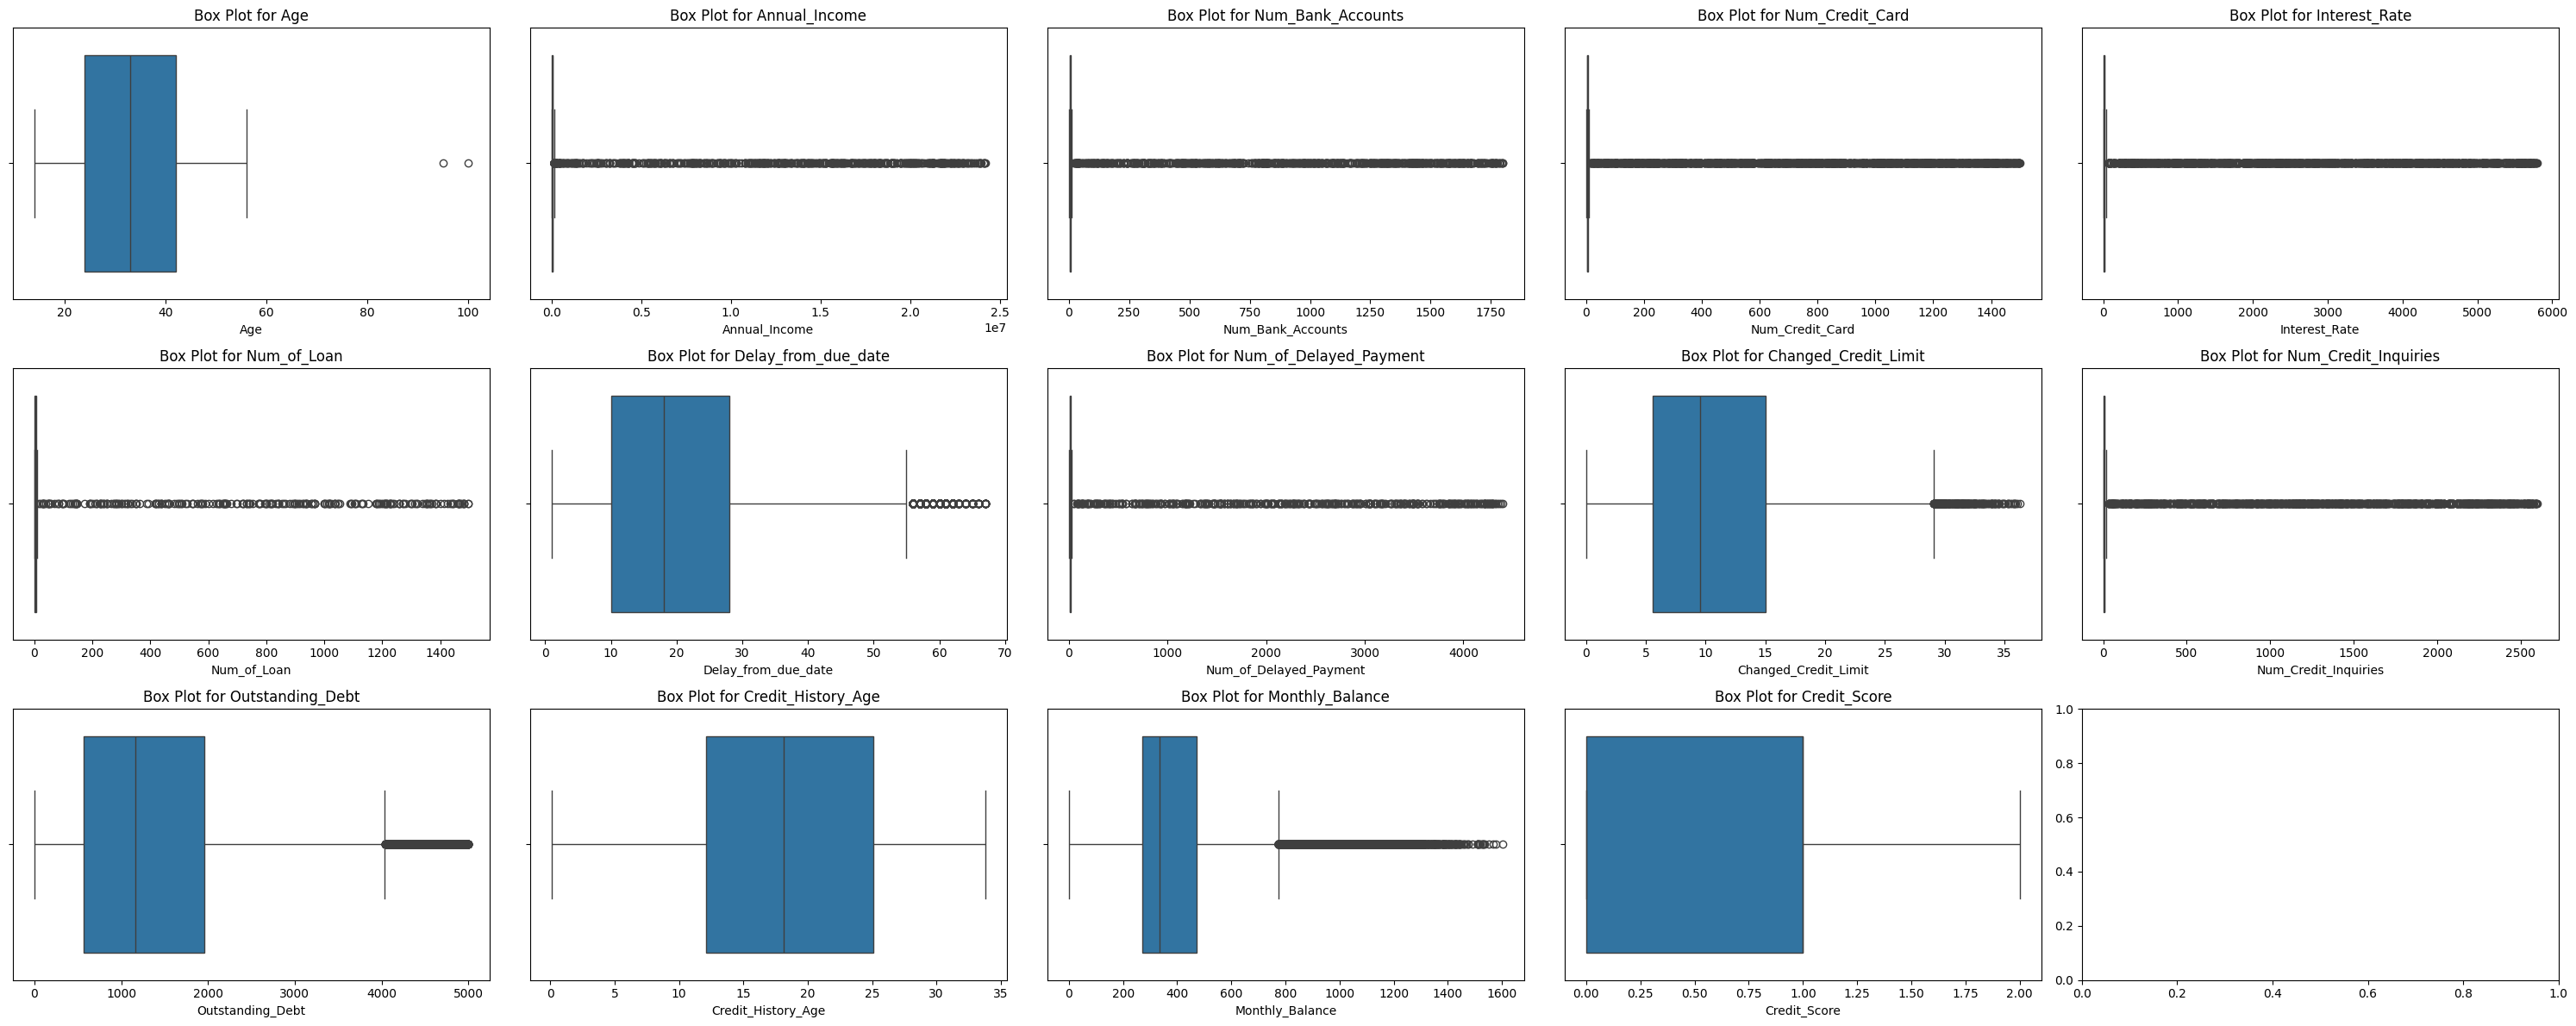

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_cleaned is your DataFrame
numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns

# Set up a 3x3 subplot grid
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(30, 12))

# Flatten the 2D array of subplots into a 1D array
axes = axes.flatten()

# Loop through each numeric column and create a box plot
for i, column in enumerate(numeric_columns):
    sns.boxplot(x=df_cleaned[column], ax=axes[i])
    axes[i].set_title(f'Box Plot for {column}')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [143]:
# Assuming df_cleaned is your DataFrame
numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns

# Loop through each numeric column and drop outliers
for column in numeric_columns:
    Q1 = df_cleaned[column].quantile(0.25)
    Q3 = df_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Drop outliers
    df_cleaned = df_cleaned.drop(df_cleaned.loc[df_cleaned[column] > (Q3 + 1.5 * IQR)].index)
    df_cleaned = df_cleaned.drop(df_cleaned.loc[df_cleaned[column] < (Q1 - 1.5 * IQR)].index)


In [144]:
df_cleaned.dropna(inplace=True)

In [145]:
df_cleaned.shape

(20620, 18)

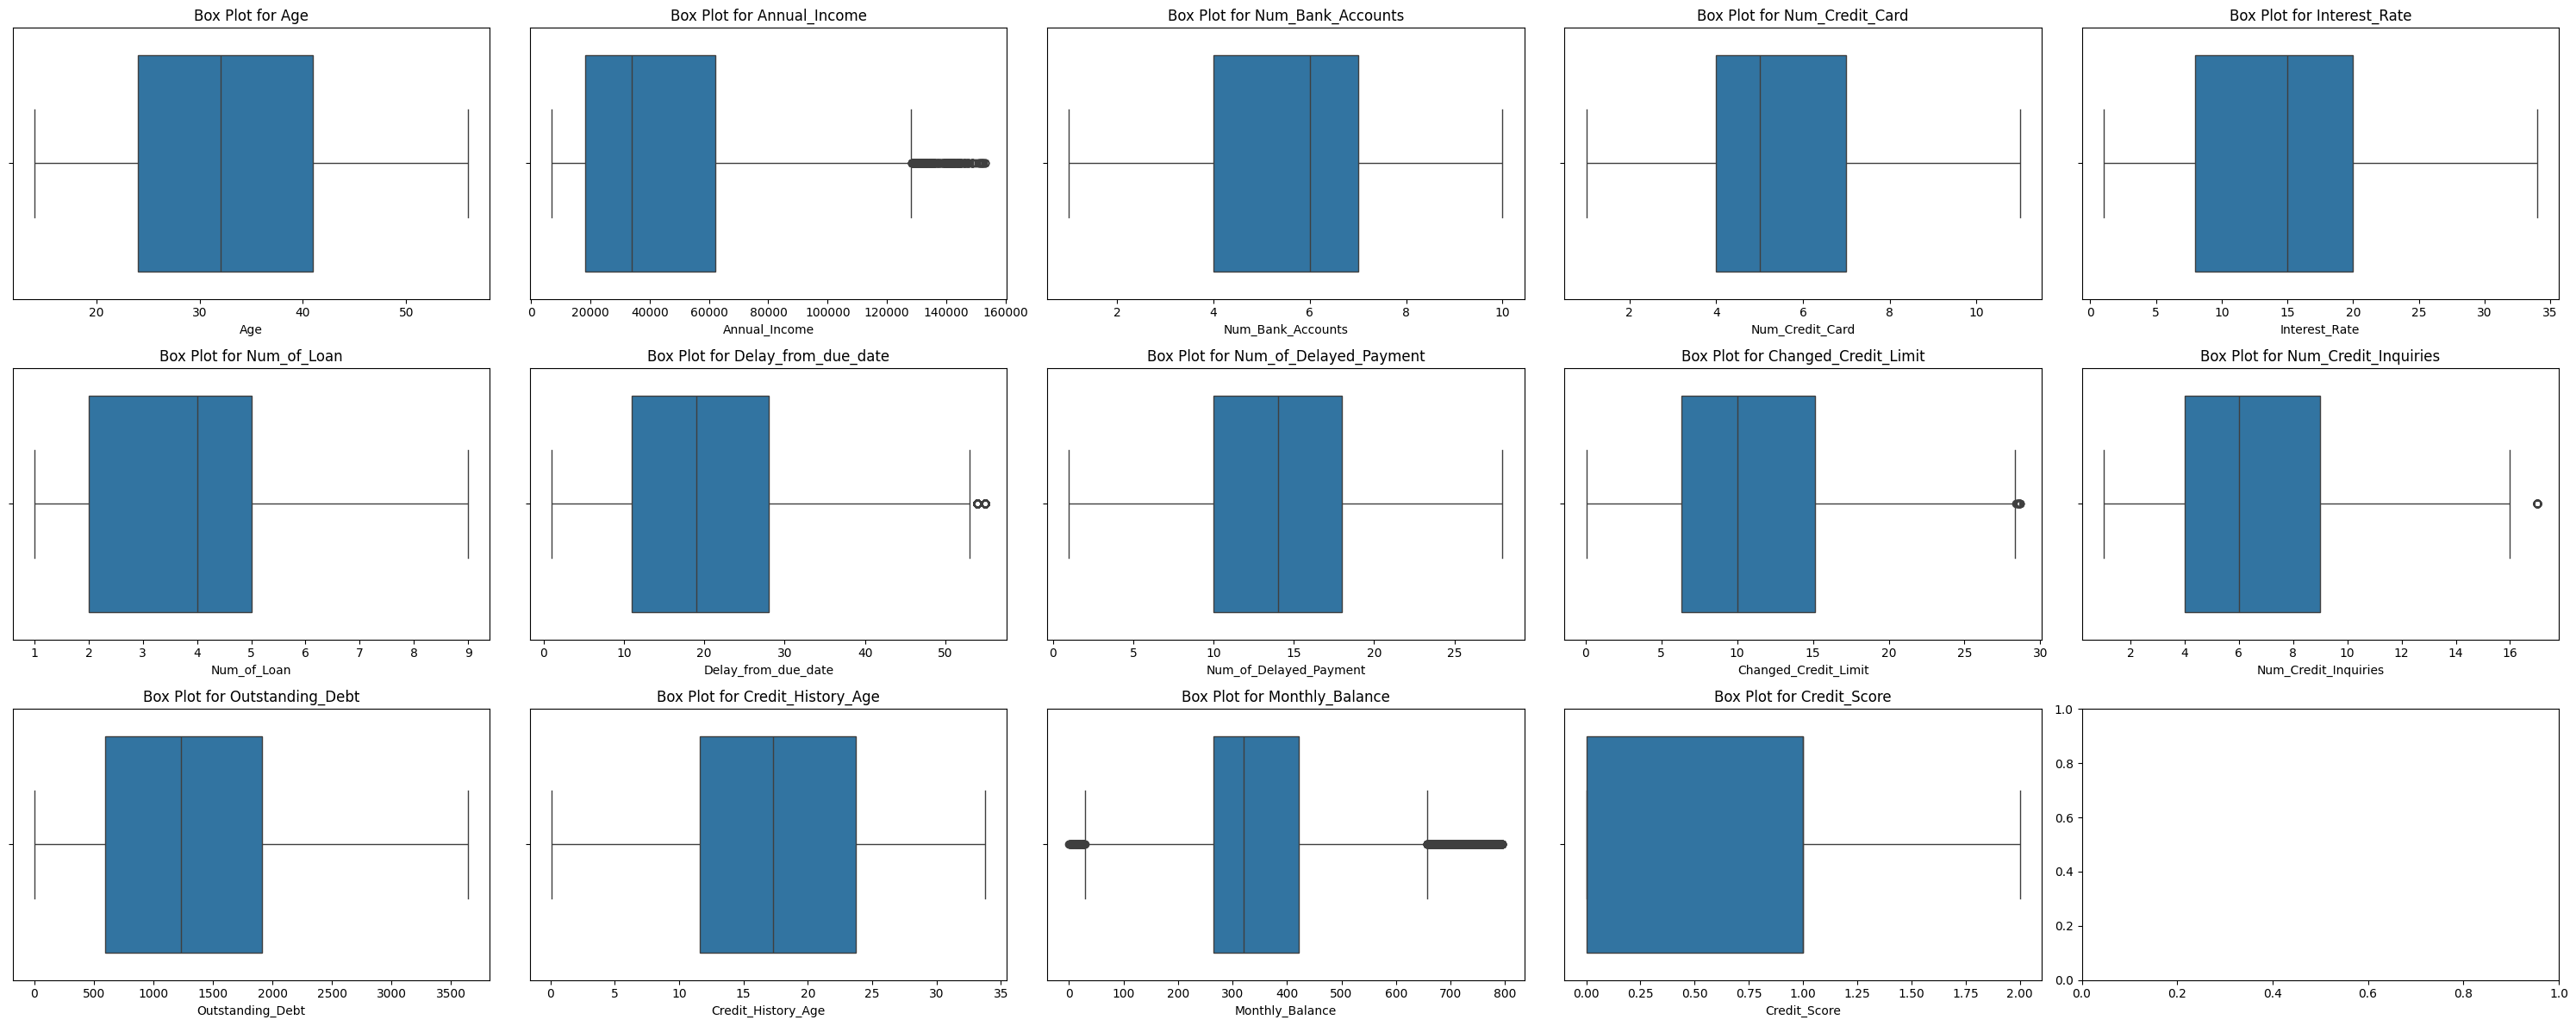

In [146]:
# Assuming df_cleaned is your DataFrame
numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns

# Set up a 3x3 subplot grid
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(30, 12))

# Flatten the 2D array of subplots into a 1D array
axes = axes.flatten()

# Loop through each numeric column and create a box plot
for i, column in enumerate(numeric_columns):
    sns.boxplot(x=df_cleaned[column], ax=axes[i])
    axes[i].set_title(f'Box Plot for {column}')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [147]:
df_cleaned.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour,Monthly_Balance,Credit_Score
3,23,Scientist,19114.12,3,4.0,3,4.0,5,4.0,6.27,4.0,Good,809.98,22.40,No,Low_spent_Small_value_payments,223.45,2
9,28,Teacher,34847.84,2,4.0,6,1.0,7,1.0,7.42,2.0,Good,605.03,26.80,No,High_spent_Large_value_payments,484.59,2
12,28,Teacher,34847.84,2,4.0,6,1.0,3,1.0,6.42,2.0,Good,605.03,26.11,No,Low_spent_Small_value_payments,444.87,2
15,28,Teacher,34847.84,2,4.0,6,1.0,3,4.0,5.42,2.0,Good,605.03,27.20,No,Low_spent_Small_value_payments,356.08,2
25,54,Entrepreneur,30689.89,2,5.0,4,1.0,5,3.0,1.99,4.0,Good,632.46,17.40,No,Low_spent_Small_value_payments,409.95,1


In [148]:
df_cleaned.shape

(20620, 18)

In [149]:
df_cleaned.to_csv('cleaned-train.csv', index=False)

* Seems like there are repeated entries but after checking the test dataset, the dataset contains future data of the repeated customers. So in this way, we're predicting the credit scores of the customer for the future


In [154]:
df_cleaned.dtypes

Age                         Int64
Occupation                 object
Annual_Income             float64
Num_Bank_Accounts           Int64
Num_Credit_Card           float64
Interest_Rate               Int64
Num_of_Loan               float64
Delay_from_due_date         Int64
Num_of_Delayed_Payment    float64
Changed_Credit_Limit      float64
Num_Credit_Inquiries      float64
Credit_Mix                 object
Outstanding_Debt          float64
Credit_History_Age        float64
Payment_of_Min_Amount      object
Payment_Behaviour          object
Monthly_Balance           float64
Credit_Score                int64
dtype: object